In [12]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
X = np.random.normal(loc=181, scale=2.7, size=600)
X = np.round(X, 0)

absfreq, bins = np.histogram(X, bins=range(170, 190))

N = sum(absfreq)
relfreq = np.cumsum(absfreq/N)

k = bins[:-1]
print (len(k))

19


### least square method

In [106]:
def residu(vec):
    mu, s = vec
    return st.norm.cdf(k, loc=mu, scale=s) - relfreq

lsqsol = opt.least_squares(residu, [180, 2])
print (lsqsol.x)
mu, s = lsqsol.x


[180.58476044   2.64738049]


### minimize method

In [107]:
def model(vec):
    return np.sum(residu(vec)**2)

minmodel = opt.minimize(model, [180,2])
print (minmodel.x)
print (np.sum(residu(minmodel.x)**2))


[180.58475705   2.64738141]
0.0018178351093241522


### curve fit

In [108]:
def func(k, mu,s):
    return st.norm.cdf(k, loc=mu, scale=s)

params, _ = opt.curve_fit(func, k, relfreq, [180,2])
print (params)
print (np.sum(residu(params)**2))

[180.58476044   2.64738049]
0.0018178351079756083


### distribution fit

In [109]:
mufit, sfit = st.norm.fit(X)
print (mufit, sfit)
print (np.sum(residu([mufit,sfit])**2))

181.14 2.624957142507283
0.034778522335458674


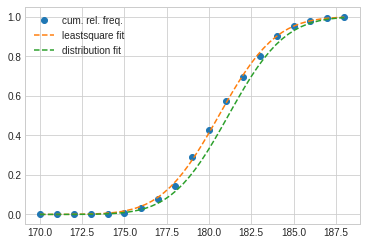

In [110]:
plt.plot(k, relfreq, 'o', label='cum. rel. freq.');

x = np.linspace(min(k), max(k))
y1 = st.norm.cdf(x, loc=mu, scale=s)
plt.plot(x, y1, '--', label='leastsquare fit');

y2 = st.norm.cdf(x, loc=mufit, scale=sfit)
plt.plot(x, y2, '--', label='distribution fit');

plt.legend();